Epoch 1/10
78/78 [==============================] - 3s 17ms/step - loss: 0.0286
Epoch 2/10
78/78 [==============================] - 1s 17ms/step - loss: 0.0188
Epoch 3/10
78/78 [==============================] - 1s 17ms/step - loss: 0.0249
Epoch 4/10
78/78 [==============================] - 1s 17ms/step - loss: 0.0265
Epoch 5/10
78/78 [==============================] - 1s 17ms/step - loss: 0.0199
Epoch 6/10
78/78 [==============================] - 1s 16ms/step - loss: 0.0222
Epoch 7/10
78/78 [==============================] - 1s 17ms/step - loss: 0.0165
Epoch 8/10
78/78 [==============================] - 1s 15ms/step - loss: 0.0149
Epoch 9/10
78/78 [==============================] - 1s 15ms/step - loss: 0.0131
Epoch 10/10
20/20 [==============================] - 0s 6ms/step


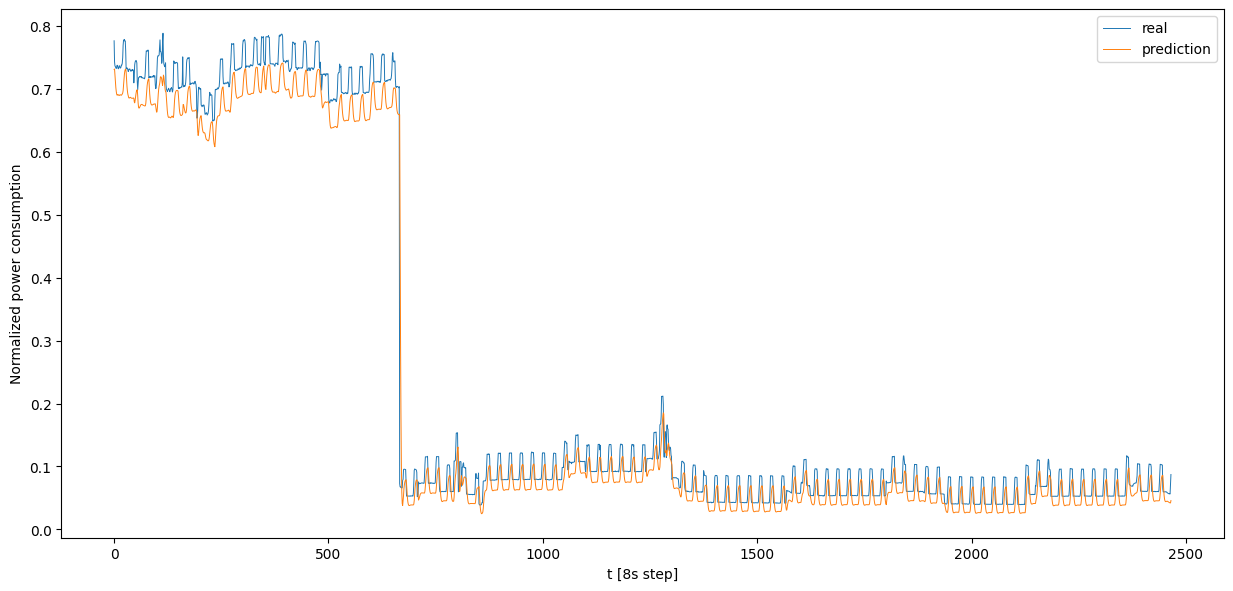

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

def scale(dataset, _min, _max):
    new_dataset = ((dataset - _min) / (_max - _min))
    return new_dataset

def unscale(dataset, _min, _max):
    new_dataset = dataset * (_max - _min) + _min
    return new_dataset

def outlier(df):

    z_score = stats.zscore(df)
    filtered = (np.abs(z_score) < 2).all(axis = 1)
    new_df = df[filtered]

    return new_df
# from datetime import datetime

# Read the csv file

dataset = pd.read_csv('Data/CDB002.csv', usecols=['ts', 'p_cons'], index_col='ts', parse_dates=['ts'])
#dataset = outlier(dataset)

_min = dataset.min()
_max = dataset.max()
dataset_scaled = scale(dataset, _min, _max)
size = int(len(dataset) * 0.80)
seq_len = 10

trainGenerator = TimeseriesGenerator(dataset_scaled[:size].to_numpy(), dataset_scaled[:size].to_numpy(), length=seq_len)
testGenerator = TimeseriesGenerator(dataset_scaled[size:].to_numpy(), dataset_scaled[size:].to_numpy(), length=seq_len)

model = Sequential()
model.add(InputLayer(input_shape=(seq_len, 1)))
model.add(LSTM(units=100))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mae')


# fit the model
model.fit(trainGenerator, epochs=10, batch_size=128)

prediction = model.predict(testGenerator)

fig = plt.figure(figsize=(15, 7), dpi=100)
plt.plot(dataset_scaled[size:].to_numpy()[10:], lw=0.7, label='real')
plt.plot(prediction, lw=0.7, label='prediction')
plt.xlabel("t [8s step]")
plt.ylabel("Normalized power consumption")
'''
Comme la taille de la séquence est 11, la première valeur prédite par le modèle est la 12-ième, il faut donc enlever les 11 premières valeurs du jeu de test.
Ce phénomène est propre à l'entrainement des modèles de Keras avec un TimeseriesGenerator
'''
plt.legend()
